# 3
- Divide the data by region,using one category for Latin America and one category to group all other regions together
- Assess statistical significance of the difference in each of the Happiness’s score components.
- Further, perform all computations necessary to justify that your conclusion is not dependent on normality of your test statistic. 

In [1]:
# Import libraries that we'll need...
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
import matplotlib
#from statsmodels.regression.linear_model import OLS
#from statsmodels.tools.tools import add_constant
#from statsmodels.nonparametric.smoothers_lowess import lowess

# new imports for polynomial regresion
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import from the 
import seaborn as sns
import warnings
from pylab import rcParams


In [71]:
# Import data 
df_happiness = pd.read_csv('./Happiness.csv')
df_happiness.head(10)

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
5,Canada,North America,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834
6,Netherlands,Western Europe,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416
7,New Zealand,Australia and New Zealand,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401
8,Australia,Australia and New Zealand,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407
9,Sweden,Western Europe,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254


In [72]:
#set some values for the plots
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(42)

####  we proceed to divide the dataset into two components, latin america (latam) and the other regions (world), then subseting just the happines score (hscore)

In [73]:
#Divide the data by region,using one category for Latin America and one category to group all other regions together

df_latam = df_happiness[df_happiness["Region"] == 'Latin America and Caribbean' ]

df_world = df_happiness[df_happiness["Region"] != 'Latin America and Caribbean' ]

#get just the happines score

hscore_latam= df_latam.loc[:,"Happiness Score"]
hscore_world = df_world.loc[:,"Happiness Score"]
hscore_latam

13     7.087
14     7.039
16     6.952
20     6.778
23     6.705
24     6.701
25     6.650
28     6.545
30     6.481
38     6.324
39     6.269
42     6.168
43     6.084
45     6.068
47     5.992
50     5.976
51     5.956
58     5.822
63     5.743
69     5.538
72     5.510
88     5.155
103    4.871
135    4.028
Name: Happiness Score, dtype: float64

# -
we first plot each component distribution and its mean, we can depict that there are some difference between this distributions and since we want to calculate this difference we perform a two sided t-test  

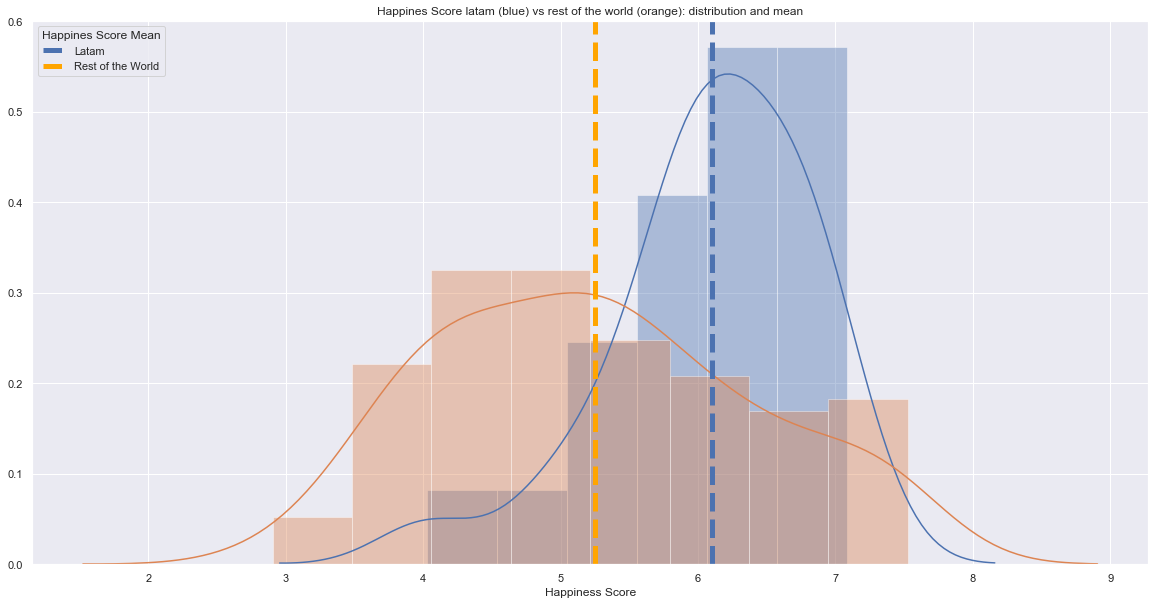

In [74]:
#Assess statistical significance of the difference in each of the Happiness’s score components.


# happines score in latam (blue) vs world (orange) 
plt.figure()
ax1 = sns.distplot(hscore_latam)
ax2 = sns.distplot(hscore_world)
plt.axvline(np.mean(hscore_latam), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(hscore_world), color='orange', linestyle='dashed', linewidth=5)
plt.legend(title='Happines Score Mean', loc='upper left', labels=['Latam','Rest of the World'])
plt.title('Happines Score latam (blue) vs rest of the world (orange): distribution and mean');

In [75]:
# Assess statistical significance of the difference in each of the Happiness’s score components.

t_stats = list()
pvals = list()
for i in range(2, 9):
    t_stats.append(stats.ttest_ind(df_latam.iloc[:,i], df_world.iloc[:,i])[0])
    pvals.append(stats.ttest_ind(df_latam.iloc[:,i], df_world.iloc[:,i])[1])

t_stats

[3.4715291205339054,
 0.5087448153114481,
 2.114876435925217,
 1.280986084823989,
 2.0567451312718625,
 -1.5214977368311584,
 -1.3649762016885076]

# -
when we fit the two sided t-test with the components can observe that the t-test results and its p-value are highly significant as expected from the plot, nevertheless we want to justify that your conclusion is not dependent on normality of your test statistic.
for that we perform 1000 boostrap replicates of each component, extract i

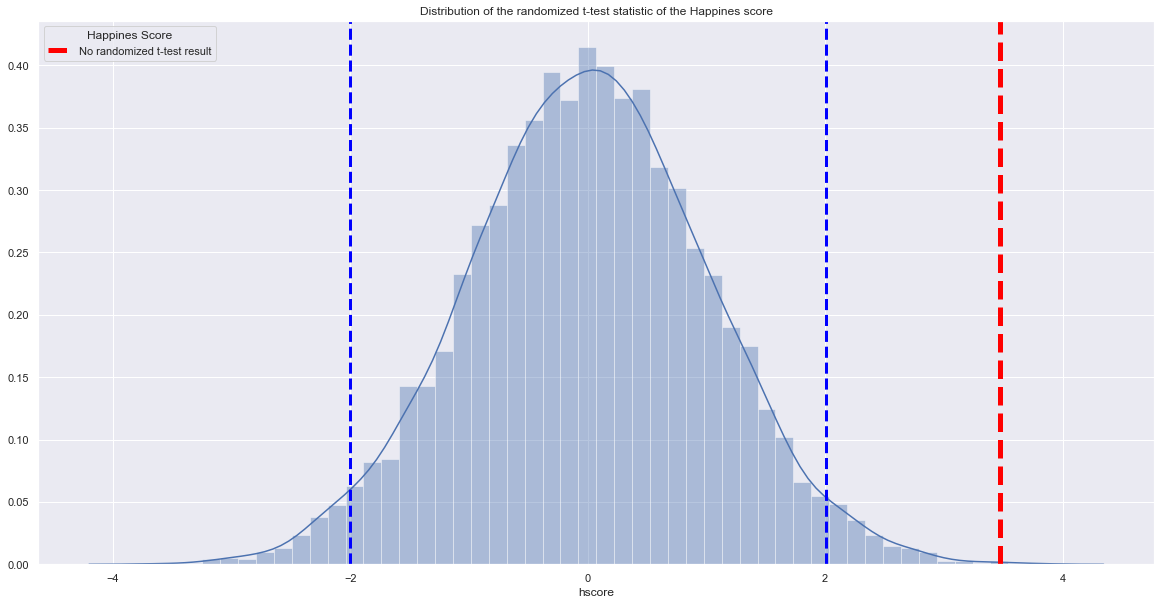

In [101]:
N_latam = len(df_latam)

component = np.array(df_happiness["Happiness Score"])
B=10000
t_stats_random0 = list()
for b in range(B):
    np.random.shuffle(component)
    group_1 = component[:N_latam]
    group_2 = component[N_latam:]
    t_stats_random0.append(stats.ttest_ind(group_1,group_2,equal_var=True)[0])

    
df_randomized= pd.DataFrame({"hscore":t_stats_random0})

plt.figure()
ax1 = sns.distplot(df_randomized["hscore"])
plt.axvline(t_stats[0], color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.quantile(t_stats_random0,0.025), color='blue', linestyle='dashed', linewidth=3)
plt.axvline(np.quantile(t_stats_random0,1-0.025), color='blue', linestyle='dashed', linewidth=3)
plt.legend(title='Happines Score', loc='upper left', labels=['No randomized t-test result'])
plt.title('Distribution of the randomized t-test statistic of the Happines score');


In [102]:
np.quantile(t_stats_random0,0.025),np.quantile(t_stats_random0,1-0.025)


(-2.0018921119716806, 2.0035436943584193)

# Components of Happiness Score- Randomization Test

In the following, knowing the previous T-test results, we will make B random permutations to the sample in order to eliminate the original assumption that our data come from our normal distribution. Then, our sample would approximate to a T distribution and make easier

In [103]:
component = np.array(df_happiness["Economy (GDP per Capita)"])
B=10000
t_stats_random1 = list()
t_stats_random1 = list()
for b in range(B):
    np.random.shuffle(component)
    group_1 = component[:N_latam]
    group_2 = component[N_latam:]
    t_stats_random1.append(stats.ttest_ind(group_1,group_2,equal_var=True)[0])
    
df_randomized["Economy"]= t_stats_random1



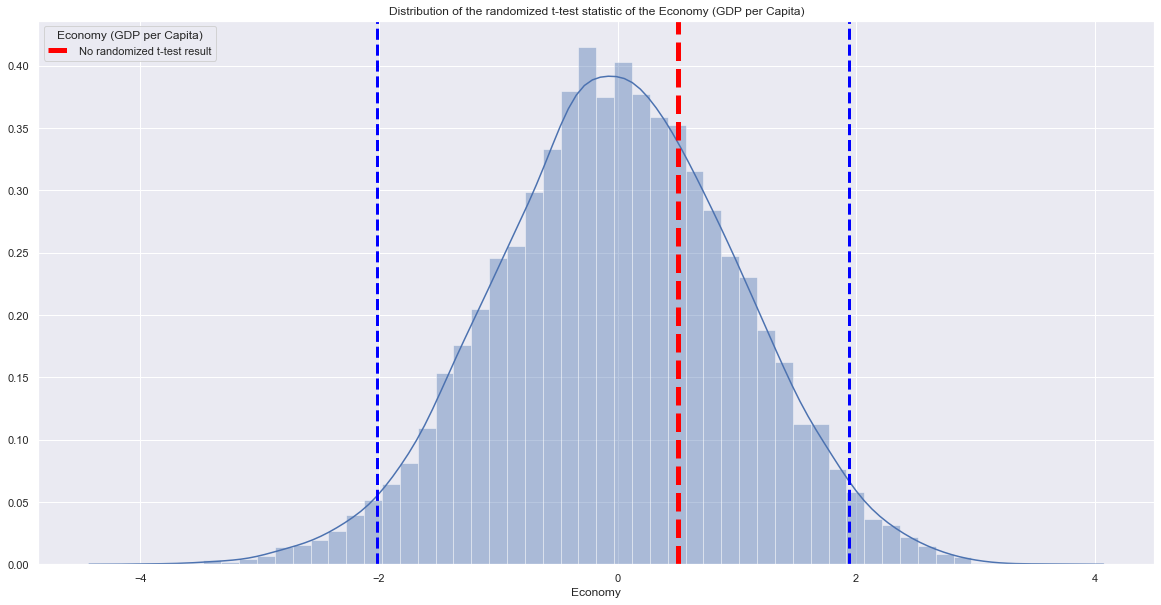

In [104]:
plt.figure()
ax1 = sns.distplot(df_randomized["Economy"])
plt.axvline(t_stats[1], color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.quantile(t_stats_random1,0.025), color='blue', linestyle='dashed', linewidth=3)
plt.axvline(np.quantile(t_stats_random1,1-0.025), color='blue', linestyle='dashed', linewidth=3)
plt.legend(title='Economy (GDP per Capita)', loc='upper left', labels=['No randomized t-test result'])
plt.title('Distribution of the randomized t-test statistic of the Economy (GDP per Capita)');

In [105]:
np.quantile(t_stats_random1,0.025),np.quantile(t_stats_random1,1-0.025)


(-2.0134637893208485, 1.9426789415772514)

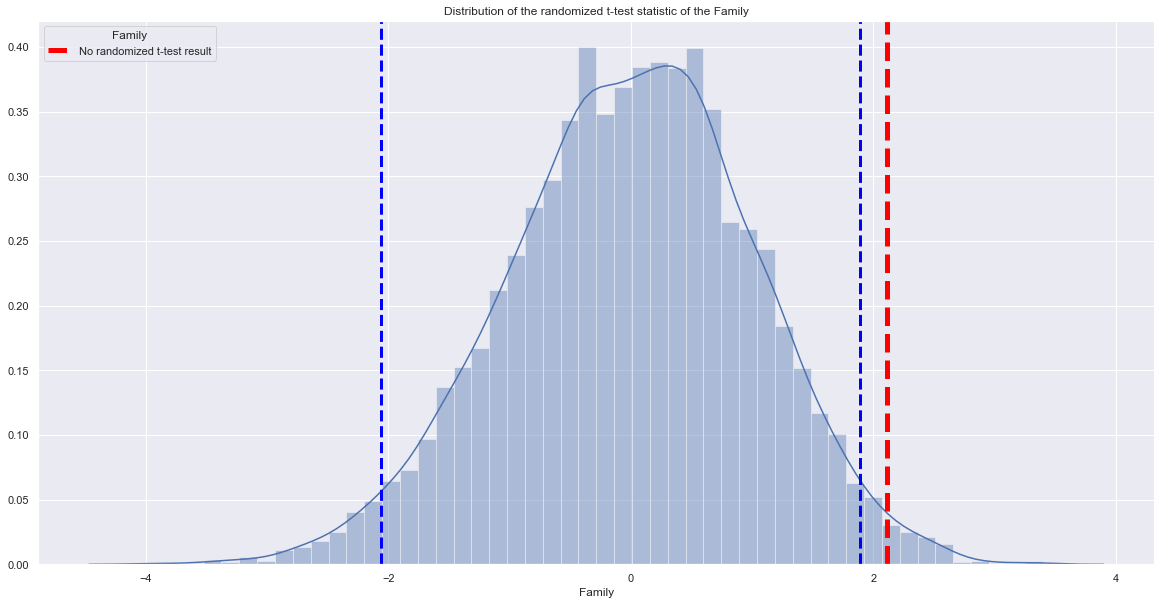

In [106]:
component = np.array(df_happiness["Family"])
B=10000
t_stats_random2= list()
for b in range(B):
    np.random.shuffle(component)
    group_1 = component[:N_latam]
    group_2 = component[N_latam:]
    t_stats_random2.append(stats.ttest_ind(group_1,group_2,equal_var=True)[0])
    
df_randomized["Family"]= t_stats_random2

plt.figure()
ax1 = sns.distplot(df_randomized["Family"])
plt.axvline(t_stats[2], color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.quantile(t_stats_random2,0.025), color='blue', linestyle='dashed', linewidth=3)
plt.axvline(np.quantile(t_stats_random2,1-0.025), color='blue', linestyle='dashed', linewidth=3)
plt.legend(title='Family', loc='upper left', labels=['No randomized t-test result'])
plt.title('Distribution of the randomized t-test statistic of the Family');

In [107]:
np.quantile(t_stats_random2,0.025),np.quantile(t_stats_random2,1-0.025)

(-2.055225412129142, 1.8890399070702921)

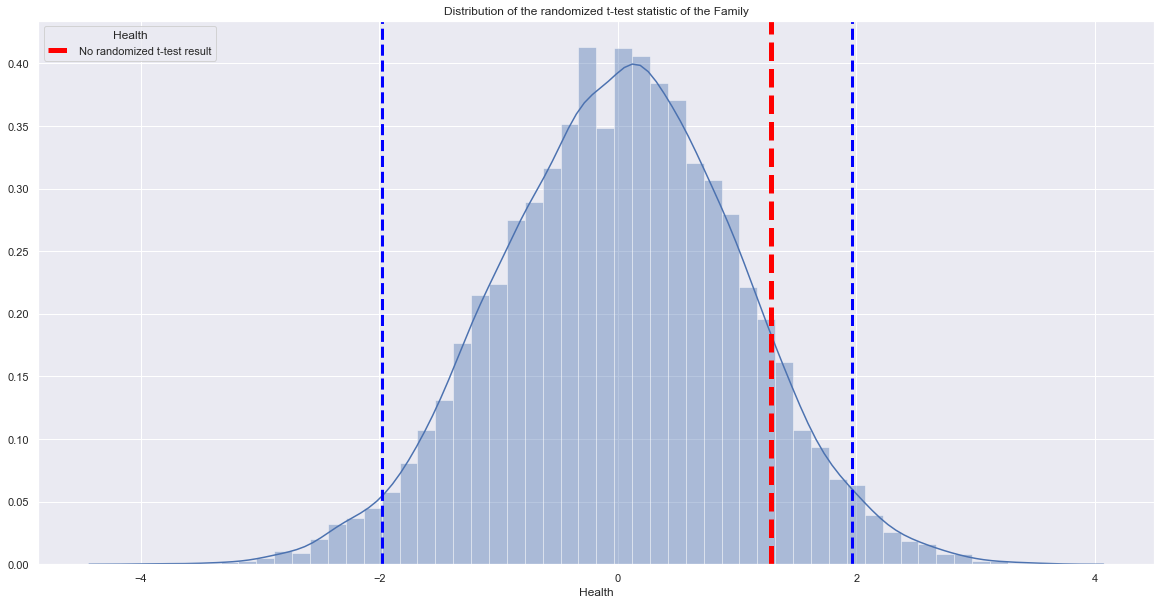

In [108]:
component = np.array(df_happiness["Health (Life Expectancy)"])
B=10000
t_stats_random3 = list()
for b in range(B):
    np.random.shuffle(component)
    group_1 = component[:N_latam]
    group_2 = component[N_latam:]
    t_stats_random3.append(stats.ttest_ind(group_1,group_2,equal_var=True)[0])
    
df_randomized["Health"]= t_stats_random3

plt.figure()
ax1 = sns.distplot(df_randomized["Health"])
plt.axvline(t_stats[3], color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.quantile(t_stats_random3,0.025), color='blue', linestyle='dashed', linewidth=3)
plt.axvline(np.quantile(t_stats_random3,1-0.025), color='blue', linestyle='dashed', linewidth=3)
plt.legend(title='Health', loc='upper left', labels=['No randomized t-test result'])
plt.title('Distribution of the randomized t-test statistic of the Family');

In [109]:
np.quantile(t_stats_random3,0.025),np.quantile(t_stats_random3,1-0.025)


(-1.9785118076076071, 1.962214696648204)

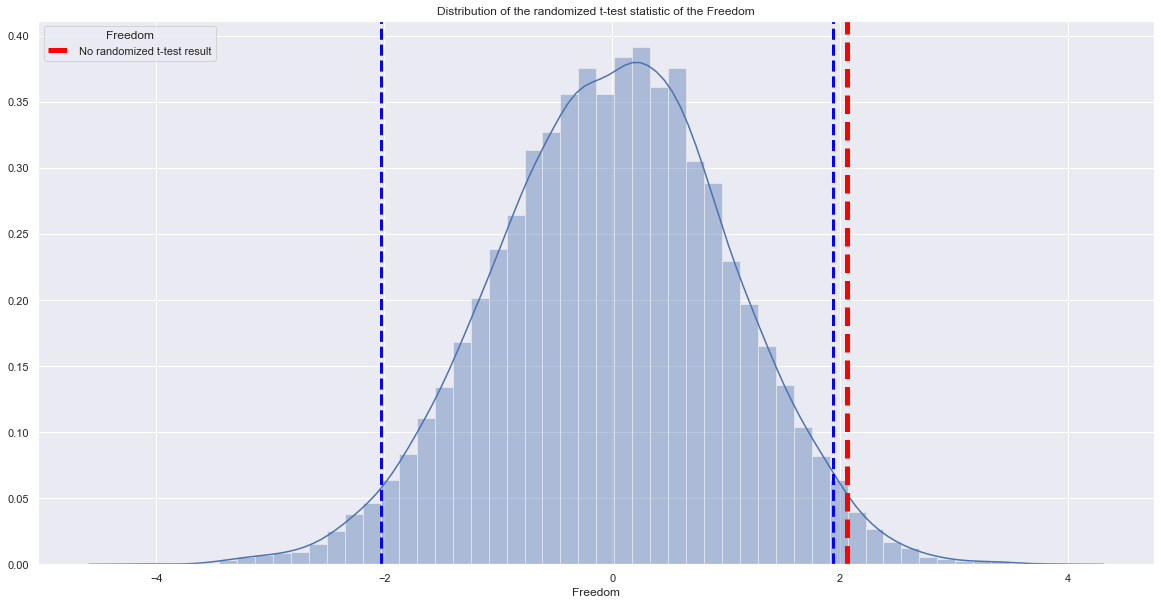

In [110]:
component = np.array(df_happiness["Freedom"])
B=10000
t_stats_random4 = list()
for b in range(B):
    np.random.shuffle(component)
    group_1 = component[:N_latam]
    group_2 = component[N_latam:]
    t_stats_random4.append(stats.ttest_ind(group_1,group_2,equal_var=True)[0])
    
df_randomized["Freedom"]= t_stats_random4

plt.figure()
ax1 = sns.distplot(df_randomized["Freedom"])
plt.axvline(t_stats[4], color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.quantile(t_stats_random4,0.025), color='blue', linestyle='dashed', linewidth=3)
plt.axvline(np.quantile(t_stats_random4,1-0.025), color='blue', linestyle='dashed', linewidth=3)
plt.legend(title='Freedom', loc='upper left', labels=['No randomized t-test result'])
plt.title('Distribution of the randomized t-test statistic of the Freedom');

In [111]:
np.quantile(t_stats_random4,0.025),np.quantile(t_stats_random4,1-0.025)


(-2.0309500457263194, 1.937176567087066)

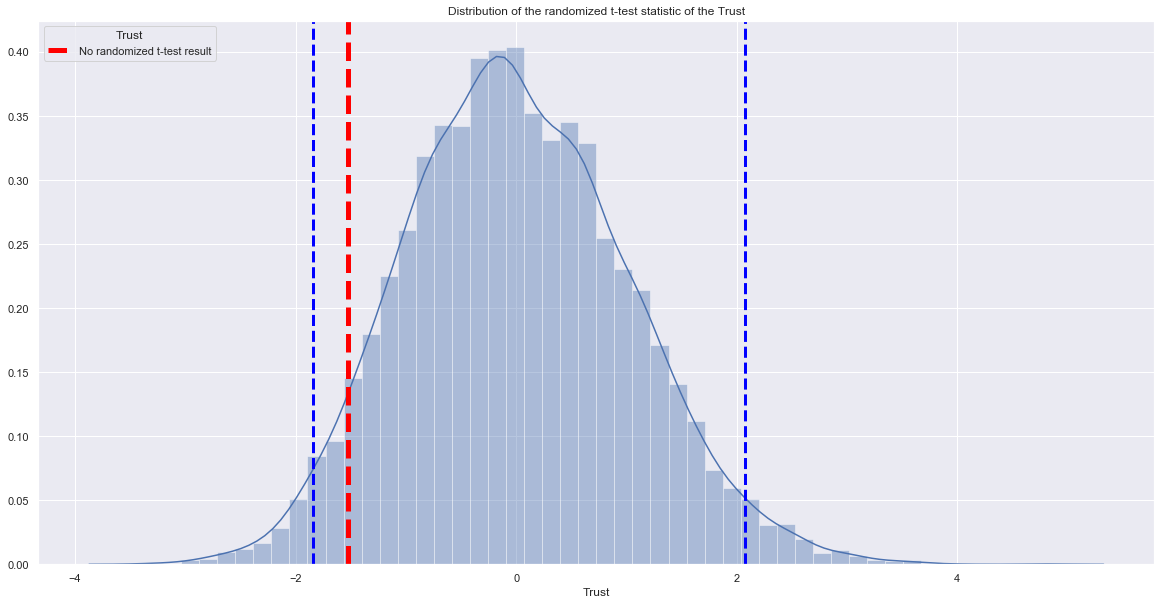

In [112]:
component = np.array(df_happiness["Trust (Government Corruption)"])
B=10000
t_stats_random5 = list()
for b in range(B):
    np.random.shuffle(component)
    group_1 = component[:N_latam]
    group_2 = component[N_latam:]
    t_stats_random5.append(stats.ttest_ind(group_1,group_2,equal_var=True)[0])
    
df_randomized["Trust"]= t_stats_random5

plt.figure()
ax1 = sns.distplot(df_randomized["Trust"])
plt.axvline(t_stats[5], color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.quantile(t_stats_random5,0.025), color='blue', linestyle='dashed', linewidth=3)
plt.axvline(np.quantile(t_stats_random5,1-0.025), color='blue', linestyle='dashed', linewidth=3)
plt.legend(title='Trust', loc='upper left', labels=['No randomized t-test result'])
plt.title('Distribution of the randomized t-test statistic of the Trust');

In [113]:
np.quantile(t_stats_random5,0.025),np.quantile(t_stats_random5,1-0.025)

(-1.846312000087154, 2.076466714188248)

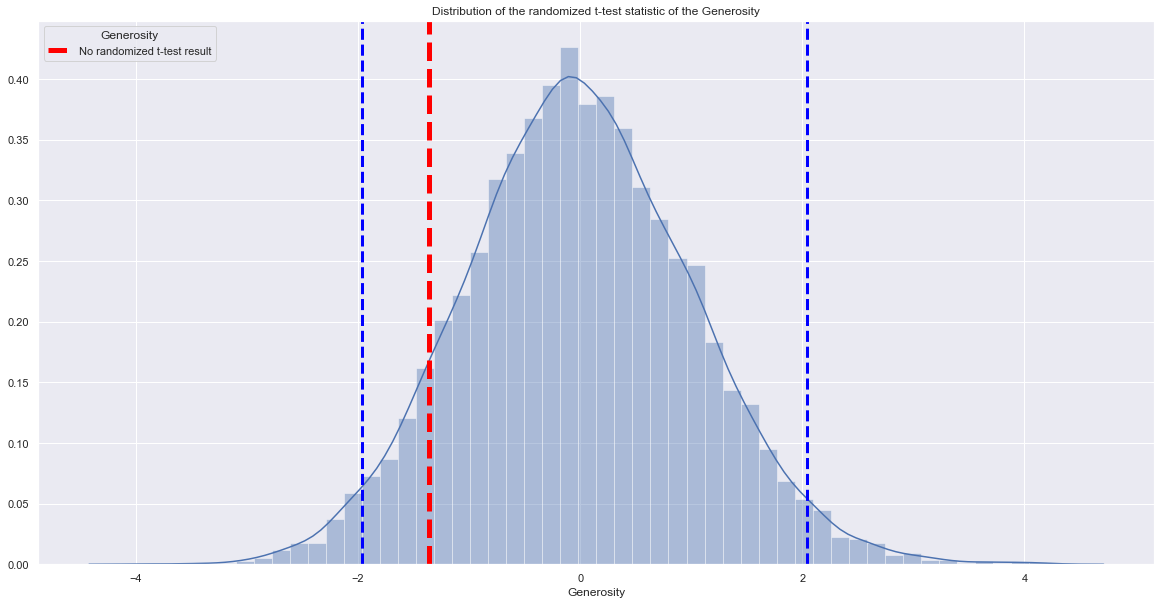

In [114]:
component = np.array(df_happiness["Generosity"])
B=10000
t_stats_random6 = list()
for b in range(B):
    np.random.shuffle(component)
    group_1 = component[:N_latam]
    group_2 = component[N_latam:]
    t_stats_random6.append(stats.ttest_ind(group_1,group_2,equal_var=True)[0])
    
df_randomized["Generosity"]= t_stats_random6

plt.figure()
ax1 = sns.distplot(df_randomized["Generosity"])
plt.axvline(t_stats[6], color='red', linestyle='dashed', linewidth=5)
plt.axvline(np.quantile(t_stats_random6,0.025), color='blue', linestyle='dashed', linewidth=3)
plt.axvline(np.quantile(t_stats_random6,1-0.025), color='blue', linestyle='dashed', linewidth=3)
plt.legend(title='Generosity', loc='upper left', labels=['No randomized t-test result'])
plt.title('Distribution of the randomized t-test statistic of the Generosity');

In [115]:
np.quantile(t_stats_random6,0.025),np.quantile(t_stats_random6,1-0.025)

(-1.967832524120071, 2.041257932872112)